In [80]:
import glob
import cv2 as cv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [84]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.models import Model

from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image


### load and use the saved model to predict


### using subset of training data for testing


In [8]:
with open ('../temp_data_file/X_train', 'rb') as fp:
    X_train = pickle.load(fp)
    
with open ('../temp_data_file/Y_train', 'rb') as fp:
    Y_train = pickle.load(fp)

### took 200 examples to validate

In [33]:
 X_train[random.randrange(4000)]

1398

In [37]:
print(type(X_train))
X_test = []
Y_test = []

for i in range(200):
    index = random.randrange(4000)
    X_test.append(X_train[index])
    Y_test.append(Y_train[index])

<class 'list'>


In [38]:
cv.imshow('check', X_train[random.randrange(4000)])
cv.waitKey(0)
cv.destroyAllWindows()

In [43]:

def SmileModel(input_shape):
    """
    Implementation of the SmileModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis= 3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), strides=(2,2), name='max_pool0')(X)
    
     # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3), strides=(1, 1), name='conv1')(X)
    X = BatchNormalization(axis= 3, name='bn1')(X)
    X = Activation('relu')(X)
    
    
    # MAXPOOL
    X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool1')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(128, (3, 3), strides=(1, 1), name='conv2')(X)
    X = BatchNormalization(axis=3, name='bn2')(X)
    X = Activation('relu')(X)
    
    
    # MAXPOOL
    X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool2')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(256, (3, 3), strides=(1, 1), name='conv3')(X)
    X = BatchNormalization(axis=3, name='bn3')(X)
    X = Activation('relu')(X)    

    # MAXPOOL
    X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool3')(X)
    
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='SmileModel')

    return model
    ### END CODE HERE ###
    


In [45]:
model = SmileModel(X_test[0].shape)
model.load_weights('../temp_data_file/weights.h5')

W1003 23:56:00.320595 139774851749696 deprecation_wrapper.py:119] From /home/saharsh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 23:56:00.383168 139774851749696 deprecation_wrapper.py:119] From /home/saharsh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1003 23:56:00.383910 139774851749696 deprecation_wrapper.py:119] From /home/saharsh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1003 23:56:00.501585 139774851749696 deprecation_wrapper.py:119] From /home/saharsh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.f

In [47]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])


W1003 23:57:42.938101 139774851749696 deprecation_wrapper.py:119] From /home/saharsh/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1003 23:57:42.984087 139774851749696 deprecation.py:323] From /home/saharsh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [118]:
Y_test = np.asarray(Y_test)
X_test = np.asarray(X_test)
preds = model.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


200/200 [==============================] - 1s 5ms/step

Loss = 0.09571081638336182
Test Accuracy = 0.975


## 97.5 % accuracy

In [55]:
### making test data images of the same resolution as that of train
def resize_images(image):
    image_resized = cv.resize(image, (100,100) )
    return image_resized

In [93]:
def checkManual(index,img_type):
    img_path = '../dataset/test/{}.{}'.format(index,img_type)
    img = image.load_img(img_path, target_size=(100,100))
    imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    ans = model.predict(x)
    if ans < 0.5:
        print('not smiling',ans)
    else:
        print('smiling',ans)

not smiling [[0.41796938]]


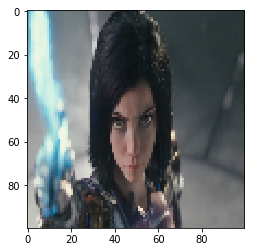

In [94]:
checkManual(1,'png')

not smiling [[0.4925638]]


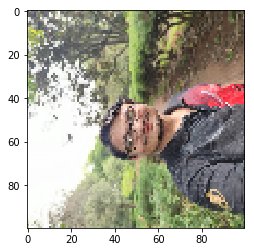

In [95]:
checkManual(2,'jpg')

not smiling [[0.18762782]]


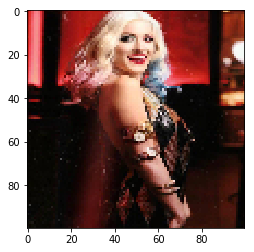

In [96]:
checkManual(3,'jpg')

smiling [[0.60354155]]


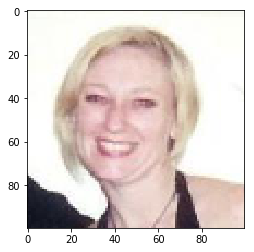

In [97]:
checkManual(4,'jpg')

not smiling [[0.37115914]]


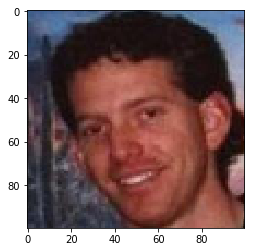

In [98]:
checkManual(5,'jpg')

smiling [[0.9891046]]


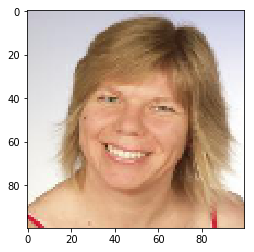

In [99]:
checkManual(6,'jpg')

smiling [[0.9253451]]


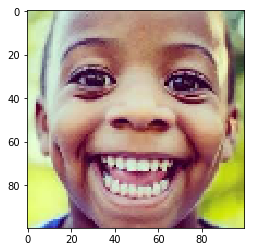

In [106]:
checkManual(7,'jpeg')

smiling [[0.99999976]]


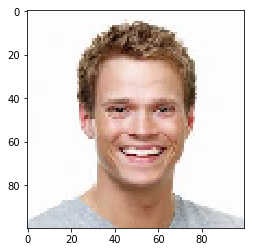

In [107]:
checkManual(8,'jpeg')

smiling [[0.65825766]]


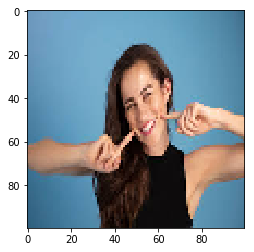

In [108]:
checkManual(9,'jpeg')

not smiling [[0.12014703]]


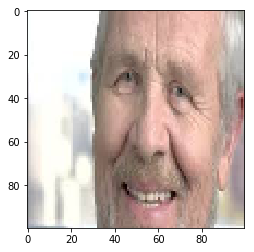

In [109]:
checkManual(10,'jpeg')

not smiling [[0.41581374]]


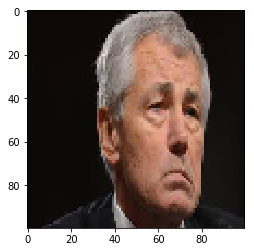

In [110]:
checkManual(11,'jpeg')

not smiling [[0.04533595]]


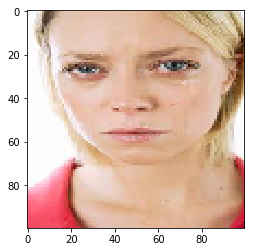

In [111]:
checkManual(12,'jpeg')

not smiling [[0.39191517]]


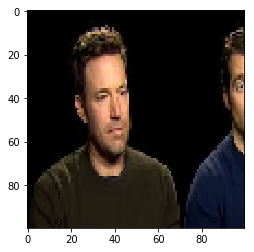

In [112]:
checkManual(13,'jpeg')

not smiling [[0.27390835]]


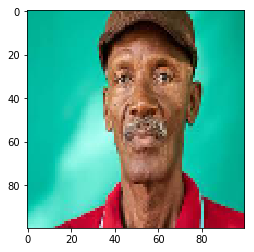

In [113]:
checkManual(14,'jpeg')

not smiling [[0.23026629]]


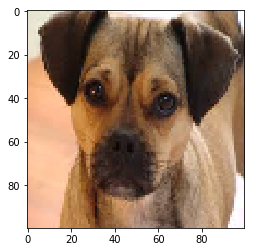

In [115]:
checkManual(15,'jpeg')
#lol right prediction even for dogs

not smiling [[0.11292945]]


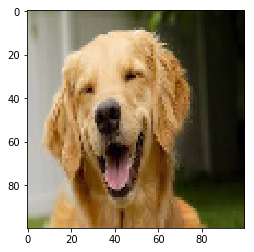

In [117]:
checkManual(16,'jpeg')
#ok not really it just predicts wrong for any dogs

not smiling [[0.26281166]]


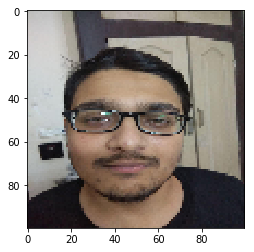

In [120]:
checkManual(17,'jpg')


smiling [[0.5185832]]


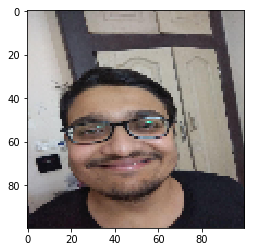

In [121]:
checkManual(18,'jpg')


not smiling [[0.19326279]]


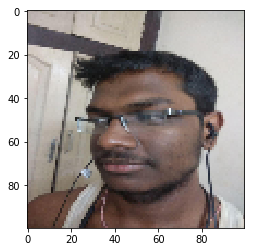

In [122]:
checkManual(19,'jpg')


not smiling [[0.13266101]]


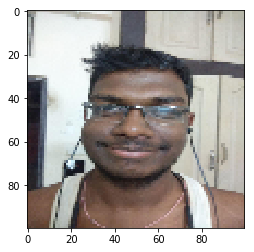

In [123]:
checkManual(20,'jpg')
